In [5]:
import pandas as pd

# Load the forecast data to inspect its structure
forecast_file_path = r'C:\Users\GLENDY\Kuliah\Semester5\analisis_big_data\uas\data\ABDforecast.csv'
forecast_data = pd.read_csv(forecast_file_path)

# Display the first few rows and column names
forecast_data

,No,Komoditas (Rp),02/ 01/ 2023,03/ 01/ 2023,04/ 01/ 2023,05/ 01/ 2023,06/ 01/ 2023,09/ 01/ 2023,10/ 01/ 2023,11/ 01/ 2023,...,11/ 11/ 2024,12/ 11/ 2024,13/ 11/ 2024,14/ 11/ 2024,15/ 11/ 2024,18/ 11/ 2024,19/ 11/ 2024,20/ 11/ 2024,21/ 11/ 2024,22/ 11/ 2024
0,I,Semua Provinsi,"30,800","30,750","30,650","30,650","30,700","30,600","30,550","30,500",...,"29,350","29,350","29,300","29,350","29,250","29,250","29,300","29,200","29,250","29,250"
1,II,Aceh,"31,950","31,950","31,950","31,950","31,950","31,800","31,900","31,850",...,"28,400","28,400","28,400","28,300","28,300","28,100","28,100","28,100","27,950","27,500"
2,III,Sumatera Utara,"31,300","31,300","31,250","31,500","32,300","32,550","32,550","32,350",...,"30,450","29,200","29,350","30,450","29,300","29,350","29,350","29,350","29,350","29,350"
3,IV,Sumatera Barat,"28,800","28,800","28,800","28,800","28,800","28,800","28,800","28,800",...,"28,150","28,150","28,150","28,150","28,150","28,150",-,"28,150","28,150","28,150"
4,V,Riau,"30,900","30,900","30,900","30,050","30,050","29,550","29,550","29,550",...,"27,750","27,800","27,750","27,750","27,750","27,750","27,750","27,750","27,750","27,750"
5,VI,Kepulauan Riau,"29,450","29,450","30,200","30,200","30,200","30,200","30,200","30,200",...,"29,000","29,750","29,750","29,750","29,750","29,650",-,"29,650","29,650","29,650"
6,VII,Jambi,"27,100","27,100","27,100","27,100","27,100","27,100","27,100","27,100",...,"25,200","25,200","25,200","25,200","25,200","25,200","25,200","25,200","25,200","25,200"
7,VIII,Bengkulu,"30,600","30,600","30,600","30,600","30,400","30,400","30,400","30,400",...,"27,450","27,450",-,"27,450","27,200","27,200","27,300","27,400","27,350","27,300"
8,IX,Sumatera Selatan,"28,050","28,050","28,200","28,200","28,200","28,200","28,250","28,200",...,"27,050","27,050","27,050","27,050","27,050","27,050","27,050","27,050","27,050","27,050"
9,X,Kepulauan Bangka Belitung,"30,000","30,000","30,000","30,000","30,000","30,250","30,250","30,500",...,"32,500","32,500","32,500","32,500","32,500","32,500","32,500","32,500","32,500","32,500"


In [3]:
# Restructure data from wide to long format
forecast_data_long = forecast_data.melt(
    id_vars=["No", "Komoditas (Rp)"],
    var_name="Date",
    value_name="Price"
)

# Clean up the data
forecast_data_long["Date"] = forecast_data_long["Date"].str.strip()  # Remove extra spaces
forecast_data_long["Price"] = forecast_data_long["Price"].str.replace(",", "").replace("-", None).astype(float)  # Convert price to numeric
forecast_data_long["Date"] = pd.to_datetime(forecast_data_long["Date"], format="%d/ %m/ %Y", errors="coerce")  # Convert date to datetime

# Filter relevant data for 2023 and 2024 only
forecast_data_long = forecast_data_long.dropna(subset=["Date", "Price"])  # Drop rows with invalid dates or prices
forecast_data_long["Year"] = forecast_data_long["Date"].dt.year
forecast_data_long["Month"] = forecast_data_long["Date"].dt.month
forecast_data_filtered = forecast_data_long[forecast_data_long["Year"].isin([2023, 2024])]

forecast_data_filtered.head()


,No,Komoditas (Rp),Date,Price,Year,Month
0,I,Semua Provinsi,2023-01-02,30800.0,2023,1
1,II,Aceh,2023-01-02,31950.0,2023,1
2,III,Sumatera Utara,2023-01-02,31300.0,2023,1
3,IV,Sumatera Barat,2023-01-02,28800.0,2023,1
4,V,Riau,2023-01-02,30900.0,2023,1


c:\Users\GLENDY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\GLENDY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


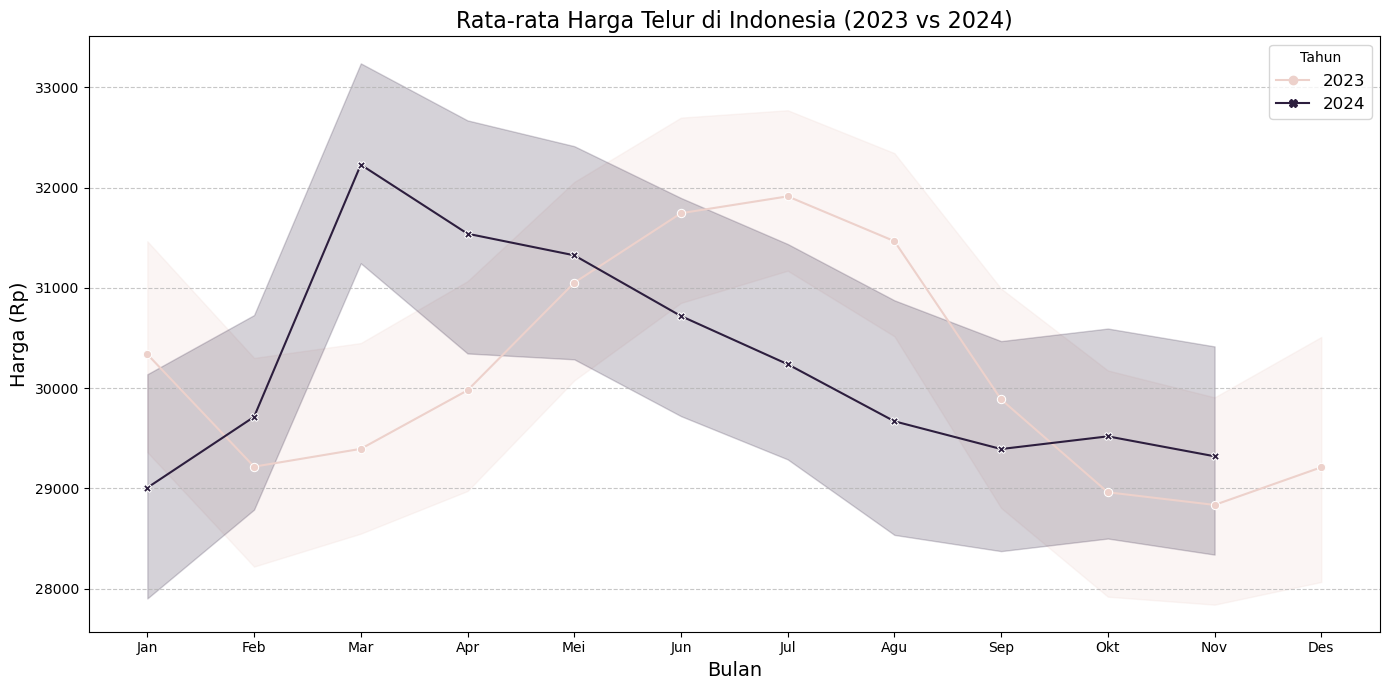

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by month and year (calculate average price per month)
monthly_avg_prices = forecast_data_filtered.groupby(["Year", "Month", "Komoditas (Rp)"])["Price"].mean().reset_index()

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_avg_prices,
    x="Month",
    y="Price",
    hue="Year",
    style="Year",
    markers=True,
    dashes=False
)

# Customizing the plot
plt.title("Rata-rata Harga Telur di Indonesia (2023 vs 2024)", fontsize=16)
plt.xlabel("Bulan", fontsize=14)
plt.ylabel("Harga (Rp)", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()
